# Utils

In [1]:
from dimelo import utils

import numpy as np

In [2]:
# Expected to error out
utils.line_plot(
    indep_vector=np.arange(25),
    indep_name='x',
    dep_vectors=[np.arange(25), np.arange(2, 20)],
    dep_names=['y1', 'y2'],
    y_label='y'
)

ValueError: All dependent and independent vectors must be the same length

# Fake Data

## Plot Enrichment

In [3]:
from dimelo import plot_enrichment

<Axes: ylabel='fraction modified bases'>

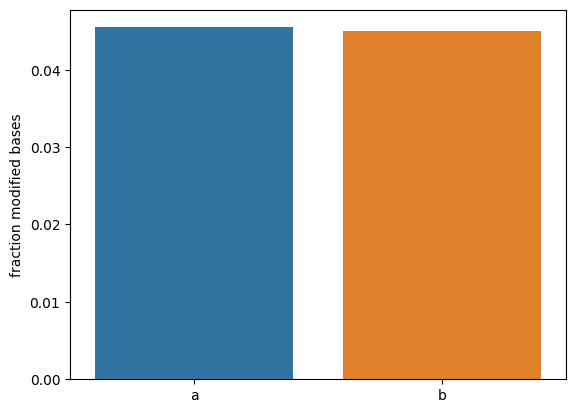

In [4]:
plot_enrichment.plot_enrichment(
    mod_file_names=['test.fake', 'test.fake'],
    bed_file_names=['test.bed', 'test.bed'],
    mod_names=['A', 'A'],
    sample_names=['a', 'b']
)

<Axes: ylabel='fraction modified bases'>

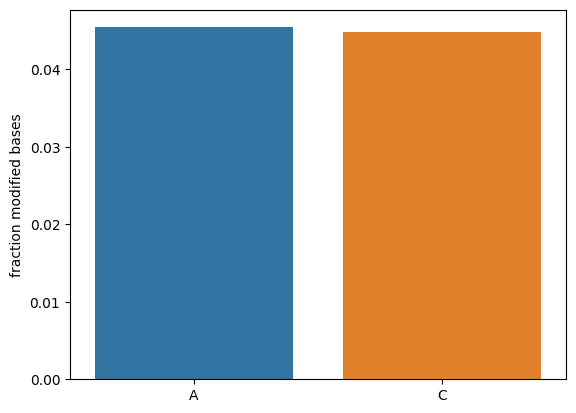

In [5]:
plot_enrichment.by_modification(
    mod_file_name='test.fake',
    bed_file_name='test.bed',
    mod_names=['A', 'C']
)

<Axes: ylabel='fraction modified bases'>

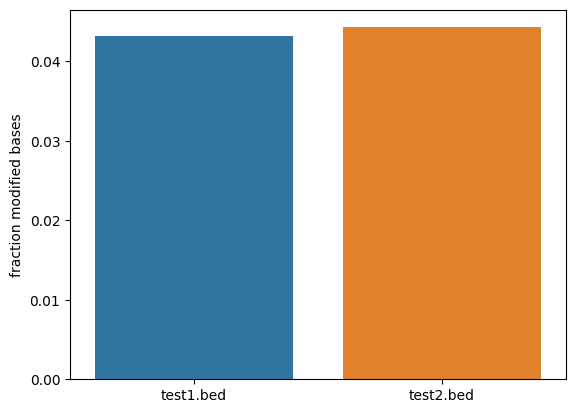

In [6]:
plot_enrichment.by_regions(
    mod_file_name='test.fake',
    bed_file_names=['test1.bed', 'test2.bed'],
    mod_name='A'
)

<Axes: ylabel='fraction modified bases'>

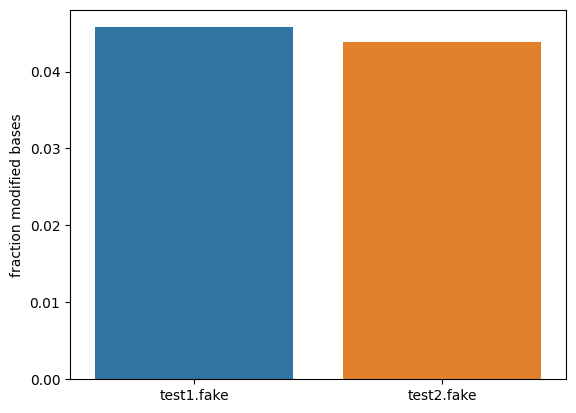

In [7]:
plot_enrichment.by_dataset(
    mod_file_names=['test1.fake', 'test2.fake'],
    bed_file_name='test.bed',
    mod_name='A'
)

## Plot Enrichment Profile

In [8]:
from dimelo import plot_enrichment_profile

In [9]:
WINDOW_SIZE = 500
SMOOTH_WINDOW=50

<Axes: xlabel='pos', ylabel='fraction modified bases'>

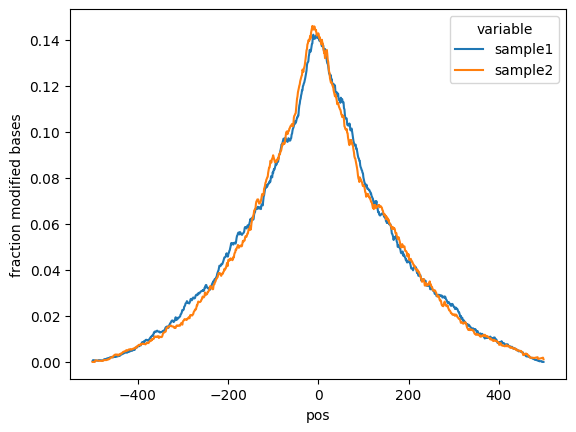

In [10]:
plot_enrichment_profile.plot_enrichment_profile(mod_file_names=['test1.fake', 'test2.fake'],
                                                bed_file_names=['test1.bed', 'test2.bed'],
                                                mod_names=['A', 'C'],
                                                window_size=WINDOW_SIZE,
                                                sample_names=['sample1', 'sample2'],
                                                smooth_window=SMOOTH_WINDOW)

<Axes: xlabel='pos', ylabel='fraction modified bases'>

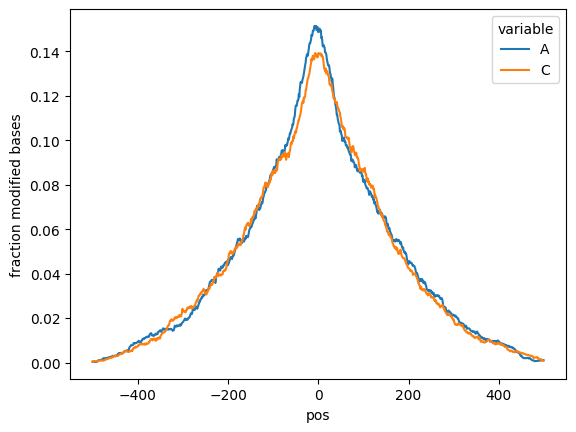

In [11]:
plot_enrichment_profile.by_modification(mod_file_name='test.fake',
                                        bed_file_name='test.bed',
                                        window_size=WINDOW_SIZE,
                                        mod_names=['A', 'C'],
                                        smooth_window=SMOOTH_WINDOW)

<Axes: xlabel='pos', ylabel='fraction modified bases'>

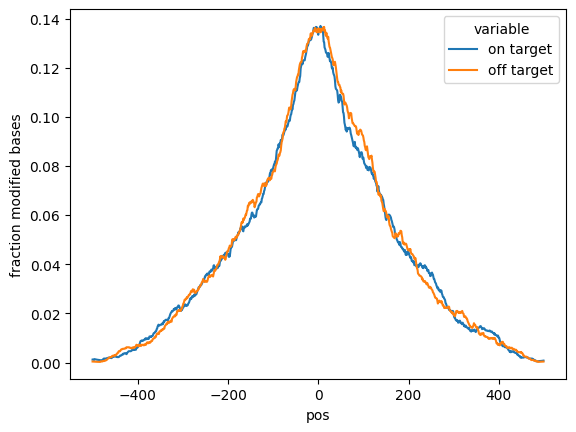

In [12]:
plot_enrichment_profile.by_regions(mod_file_name='test.fake',
                                   bed_file_names=['test1.bed', 'test2.bed'],
                                   mod_name='A',
                                   window_size=WINDOW_SIZE,
                                   sample_names=['on target', 'off target'],
                                   smooth_window=SMOOTH_WINDOW)

<Axes: xlabel='pos', ylabel='fraction modified bases'>

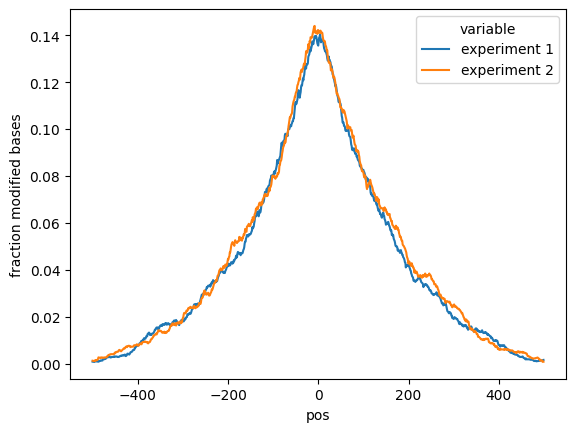

In [13]:
plot_enrichment_profile.by_dataset(mod_file_names=['test1.fake', 'test2.fake'],
                                   bed_file_name='test.bed',
                                   mod_name='A',
                                   window_size=WINDOW_SIZE,
                                   sample_names=['experiment 1', 'experiment 2'],
                                   smooth_window=SMOOTH_WINDOW)

## Plot Single Reads

In [14]:
from dimelo import plot_reads

In [15]:
# This is expected to be broken; need to re-enable test data
plot_reads.plot_single_reads_rectangle('test.bed', 'test.bed', ['A', 'C'])

AttributeError: module 'dimelo.plot_reads' has no attribute 'plot_single_reads_rectangle'

# Real Data

## Plot Enrichment Profile

In [16]:
from pathlib import Path

from dimelo import plot_enrichment_profile
from dimelo import parse_bam

In [17]:
valid_bam_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/20231010_5thFloorTest_CTCF.bam')
# bed_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/ENCFF797SDL.chm13v1.1.bed')
bed_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/ENCFF797SDL-first-100.chm13v1.0.bed')
ref_genome_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/chm13.draft_v1.1.fasta')
test_output_dir = Path('./dimelo/test_outputs')
test_output_dir.mkdir(exist_ok=True)

output_name = '.'.join([valid_bam_file.stem, bed_file.stem])

basemods = ['A,0','CG,0']
window_size = 500

In [18]:
gz_file = parse_bam.parse_bam_pileup(
    input_file=valid_bam_file,
    output_name=output_name,
    ref_genome=ref_genome_file,
    output_directory=test_output_dir,
    bed_file=bed_file,
    basemods=basemods,
    thresh=0.9,
    window_size=window_size,
    cores=None
)

Processing from ENCFF797SDL-first-100.chm13v1.0.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL-first-100.chm13v1.0.windowed500-for-pileup.bed
No specified number of cores requested. 10 available on machine, allocating 5
Modification threshold of 0.9 will be treated as coming from range 0-1.


> parsed user-input threshold 0.9 for mod-code a
> parsed user-input threshold 0.9 for mod-code m
> parsing BED at dimelo/test_outputs/20231010_5thFloorTest_CTCF.ENCFF797SDL-first-100.chm13v1.0/ENCFF797SDL-first-100.chm13v1.0.windowed500-for-pileup.bed
> processed 100 BED lines
> calculated chunk size: 7, interval size 100000, processing 700000 positions concurrently
> Using filter threshold 0.9 for mod code a.
> Using filter threshold 0.9 for mod code m.
> Done, processed 44921 rows. Processed ~374 reads and skipped zero reads.


In [3]:
gz_file = Path('dimelo/test_outputs/20231010_5thFloorTest_CTCF.ENCFF797SDL-first-100.chm13v1.0/pileup.sorted.bed.gz')

Loading regions from ENCFF797SDL-first-100.chm13v1.0.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL-first-100.chm13v1.0.windowed500-for-readout.bed
Loading regions from ENCFF797SDL-first-100.chm13v1.0.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL-first-100.chm13v1.0.windowed500-for-readout.bed


<Axes: xlabel='pos', ylabel='fraction modified bases'>

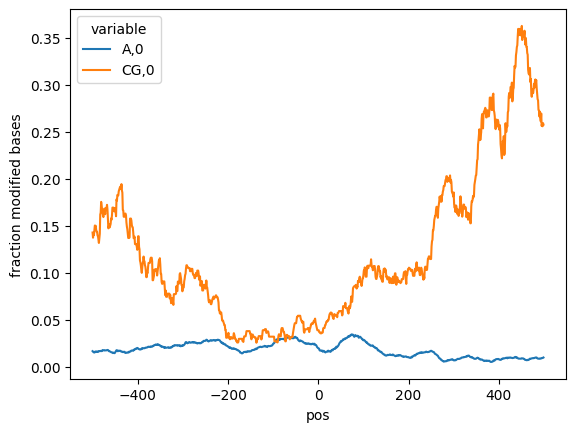

In [21]:
plot_enrichment_profile.by_modification(
    mod_file_name=gz_file,
    bed_file_name=bed_file,
    window_size=window_size,
    mod_names=basemods,
    smooth_window=50
)

## Plot Enrichment

In [22]:
from pathlib import Path

from dimelo import plot_enrichment
from dimelo import parse_bam

In [23]:
valid_bam_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/20231010_5thFloorTest_CTCF.bam')
bed_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/ENCFF797SDL.chm13v1.1.bed')
ref_genome_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/chm13.draft_v1.1.fasta')
test_output_dir = Path('./dimelo/test_outputs')
test_output_dir.mkdir(exist_ok=True)

output_name = '.'.join([valid_bam_file.stem, bed_file.stem])

basemods = ['A,0','CG,0']
window_size = 500
test_mod_file = gz_file

<Axes: ylabel='fraction modified bases'>

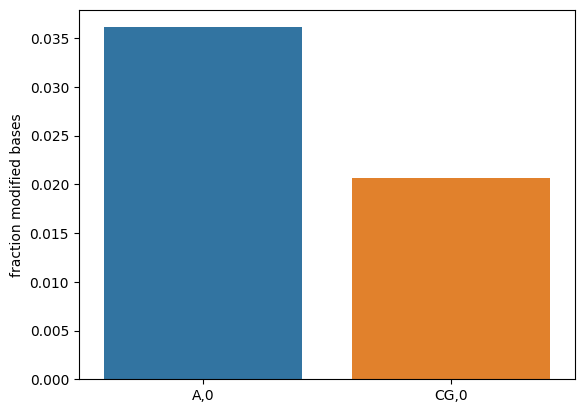

In [24]:
plot_enrichment.by_modification(mod_file_name=test_mod_file,
                                bed_file_name=bed_file,
                                mod_names=basemods)

## Plot Reads

In [25]:
from pathlib import Path

from dimelo import plot_reads
from dimelo import parse_bam

In [26]:
valid_bam_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/20231010_5thFloorTest_CTCF.bam')
bed_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/ENCFF797SDL-first-100.chm13v1.0.bed')
ref_genome_file = Path('/Users/jeremy/devspace/modkit_exploration/analysis/chm13.draft_v1.1.fasta')
test_output_dir = Path('./dimelo/test_outputs')
test_output_dir.mkdir(exist_ok=True)

# output_name = '.'.join([valid_bam_file.stem, bed_file.stem])

# test_mod_file = f'{test_output_dir / output_name}.sorted.bed.gz'
basemods = ['A,0','CG,0']
window_size = 500

In [27]:
hdf5_file = parse_bam.parse_bam_extract(
    input_file=valid_bam_file,
    output_name=output_name,
    ref_genome=ref_genome_file,
    output_directory=test_output_dir,
    bed_file=bed_file,
    basemods=basemods,
    thresh=0.9,
    window_size=window_size,
    cores=None
)

Processing from ENCFF797SDL-first-100.chm13v1.0.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL-first-100.chm13v1.0.windowed500-for-extract.bed
No specified number of cores requested. 10 available on machine, allocating 5
Modification threshold of 0.9 will be treated as coming from range 0-1.
Extracting A,0 sites


> specifying include-only BED outputs only mapped sites
> parsing BED at dimelo/test_outputs/20231010_5thFloorTest_CTCF.ENCFF797SDL.chm13v1.1/ENCFF797SDL-first-100.chm13v1.0.windowed500-for-extract.bed
> processed 100 BED lines
> found BAM index, processing reads in 100000 base pair chunks
> processed 4157 reads, 83286 rows, skipped ~3792 reads, failed ~0 reads


Adding A,0 to dimelo/test_outputs/20231010_5thFloorTest_CTCF.ENCFF797SDL.chm13v1.1/reads.combined_basemods.h5
368 reads found in dimelo/test_outputs/20231010_5thFloorTest_CTCF.ENCFF797SDL.chm13v1.1/reads.A,0.txt
Extracting CG,0 sites


> specifying include-only BED outputs only mapped sites
> parsing BED at dimelo/test_outputs/20231010_5thFloorTest_CTCF.ENCFF797SDL.chm13v1.1/ENCFF797SDL-first-100.chm13v1.0.windowed500-for-extract.bed
> processed 100 BED lines
> found BAM index, processing reads in 100000 base pair chunks
> processed 4157 reads, 8371 rows, skipped ~3798 reads, failed ~0 reads


Adding CG,0 to dimelo/test_outputs/20231010_5thFloorTest_CTCF.ENCFF797SDL.chm13v1.1/reads.combined_basemods.h5
362 reads found in dimelo/test_outputs/20231010_5thFloorTest_CTCF.ENCFF797SDL.chm13v1.1/reads.CG,0.txt
extending from 368 to 730


In [29]:
hdf5_file = Path('dimelo/test_outputs/20231010_5thFloorTest_CTCF.ENCFF797SDL.chm13v1.1/reads.combined_basemods.h5')

Loading regions from ENCFF797SDL-first-100.chm13v1.0.bed using even 500bp windows in either direction from bed region centers.
Writing new bed file ENCFF797SDL-first-100.chm13v1.0.windowed500-for-readout.bed


<Axes: xlabel='pos', ylabel='read_name'>

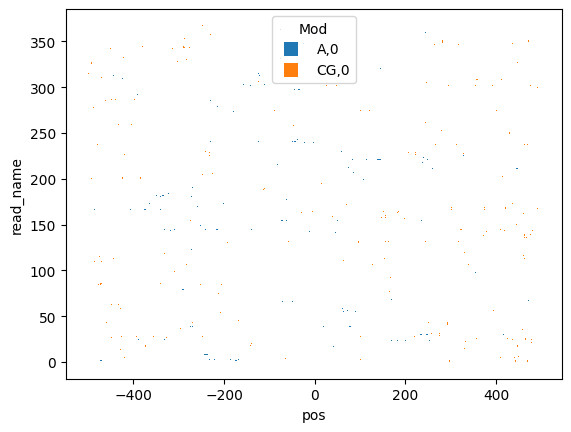

In [30]:
plot_reads.plot_reads(
    mod_file_name=hdf5_file,
    bed_file_name=bed_file,
    mod_names=basemods,
    window_size=window_size
)
